In [12]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DATASETS2\Student_Performance.csv")

In [14]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [17]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [18]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 7 99 9 1]
 [1.0 0.0 4 82 4 2]
 [0.0 1.0 8 51 7 2]
 ...
 [0.0 1.0 6 83 8 5]
 [0.0 1.0 9 97 7 0]
 [1.0 0.0 7 74 8 1]]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9880686410711422

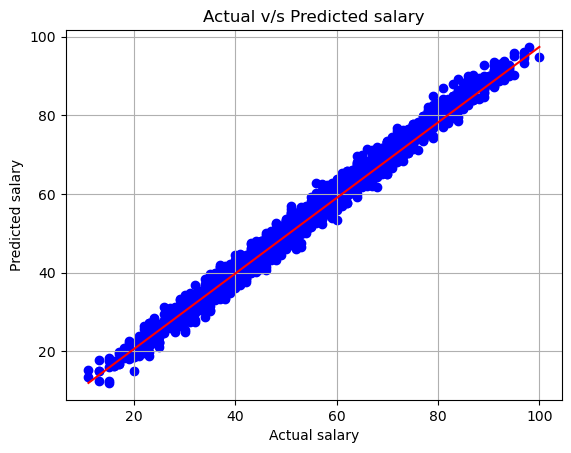

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.title("Actual v/s Predicted salary")
plt.grid(True)
plt.show()